# 📊 Sales Data Analysis
A comprehensive analysis of sales performance, trends, and revenue drivers.

## 🧾 Executive Summary

This analysis explores historical sales data to identify key revenue drivers, customer behavior patterns, and market trends.
The results show strong seasonal demand with significant revenue spikes during Q4, indicating that sales performance is highly time-dependent. Large deal sizes and a small segment of high-value customers contribute the majority of total revenue, highlighting the importance of enterprise sales and customer retention strategies.
Additionally, sales are concentrated in a few top product lines and geographic markets, suggesting both growth opportunities and potential dependency risks.
Overall, the findings provide actionable insights to improve demand forecasting, optimize sales strategy, and support data-driven decision-making.

---

## 🎯 Business Objective
The objective of this analysis is to evaluate historical sales data to identify revenue trends, key performance drivers, and customer purchasing behavior. The insights will help support strategic decisions in sales planning, demand forecasting, and growth opportunities.

In [1]:
import pandas as pd

df = pd.read_csv("sales_data_sample.csv", encoding="latin1")
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


## 📊 Dataset Overview

The dataset consists of 2,823 sales transaction records with 25 features describing order details, product information, customer attributes, and revenue metrics.

Key variables include:
- Order details: ORDERNUMBER, ORDERDATE, STATUS
- Sales metrics: SALES, QUANTITYORDERED, PRICEEACH
- Product attributes: PRODUCTLINE, PRODUCTCODE
- Customer & geography: CUSTOMERNAME, COUNTRY, CITY, TERRITORY

This structure enables analysis of sales trends, customer behavior, and revenue performance across time and product categories.

In [2]:
df.shape

(2823, 25)

## 🧹 Data Cleaning & Preparation

Before analysis, the dataset was validated and transformed to ensure accuracy and consistency of results.

To ensure data quality and accuracy:
- Verified dataset dimensions and column structure
- Converted ORDERDATE to datetime format
- Checked for missing values and inconsistencies
- Prepared data for time-series and aggregation analysis

In [3]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## 🔎 Exploratory Data Analysis

In this section, we explore the dataset to understand its structure, distributions, and key patterns. 
We analyze sales trends over time, performance by product lines and deal sizes, and geographic revenue distribution to identify potential drivers of business performance.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [5]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

<Axes: xlabel='ORDERDATE'>

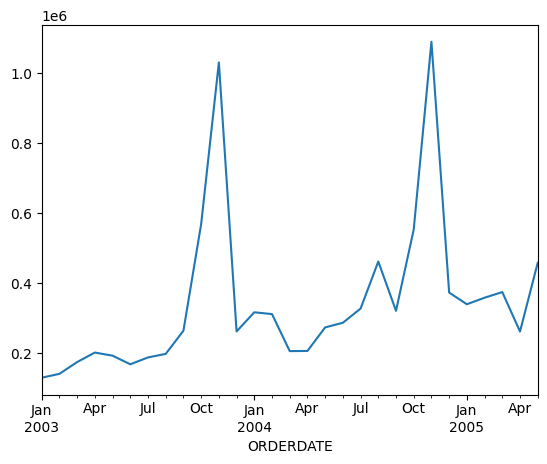

In [6]:
sales_trend = df.groupby(df['ORDERDATE'].dt.to_period('M'))['SALES'].sum()
sales_trend.plot()

In [7]:
df.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

PRODUCTLINE
Classic Cars        3919615.66
Vintage Cars        1903150.84
Motorcycles         1166388.34
Trucks and Buses    1127789.84
Planes               975003.57
Ships                714437.13
Trains               226243.47
Name: SALES, dtype: float64

In [8]:
df.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False).head(10)

COUNTRY
USA          3627982.83
Spain        1215686.92
France       1110916.52
Australia     630623.10
UK            478880.46
Italy         374674.31
Finland       329581.91
Norway        307463.70
Singapore     288488.41
Denmark       245637.15
Name: SALES, dtype: float64

In [9]:
df.groupby('DEALSIZE')['SALES'].sum()

DEALSIZE
Large     1302119.26
Medium    6087432.24
Small     2643077.35
Name: SALES, dtype: float64

In [10]:
top_customers = (
    df.groupby('CUSTOMERNAME')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)
top_customers

CUSTOMERNAME
Euro Shopping Channel           912294.11
Mini Gifts Distributors Ltd.    654858.06
Australian Collectors, Co.      200995.41
Muscle Machine Inc              197736.94
La Rochelle Gifts               180124.90
Dragon Souveniers, Ltd.         172989.68
Land of Toys Inc.               164069.44
The Sharp Gifts Warehouse       160010.27
AV Stores, Co.                  157807.81
Anna's Decorations, Ltd         153996.13
Name: SALES, dtype: float64

<Axes: xlabel='ORDERDATE'>

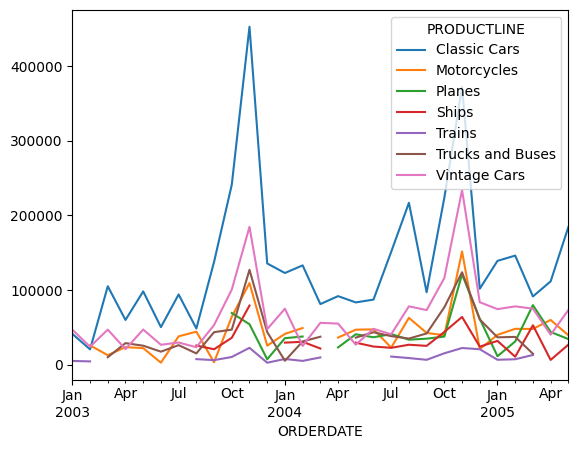

In [11]:
product_trend = df.groupby(
    [df['ORDERDATE'].dt.to_period('M'), 'PRODUCTLINE']
)['SALES'].sum().unstack()

product_trend.plot()

In [12]:
region_sales = df.groupby('TERRITORY')['SALES'].sum().sort_values(ascending=False)
region_sales

TERRITORY
EMEA     4979272.41
APAC      746121.83
Japan     455173.22
Name: SALES, dtype: float64

In [13]:
aov = df['SALES'].sum() / df['ORDERNUMBER'].nunique()
aov

np.float64(32679.57280130293)

In [14]:
repeat_customers = (
    df.groupby('CUSTOMERNAME')['ORDERNUMBER']
    .nunique()
    .sort_values(ascending=False)
    .head(10)
)
repeat_customers

CUSTOMERNAME
Euro Shopping Channel           26
Mini Gifts Distributors Ltd.    17
Australian Collectors, Co.       5
Danish Wholesale Imports         5
Reims Collectables               5
Dragon Souveniers, Ltd.          5
Muscle Machine Inc               4
Land of Toys Inc.                4
Blauer See Auto, Co.             4
Corporate Gift Ideas Co.         4
Name: ORDERNUMBER, dtype: int64

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.style.use('default')

<Figure size 1000x500 with 0 Axes>

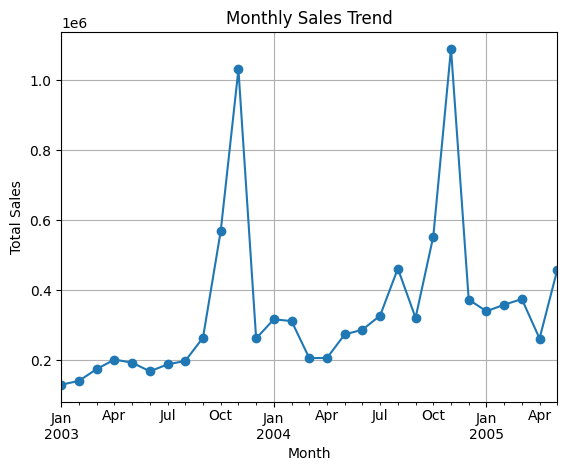

In [16]:
sales_trend.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()

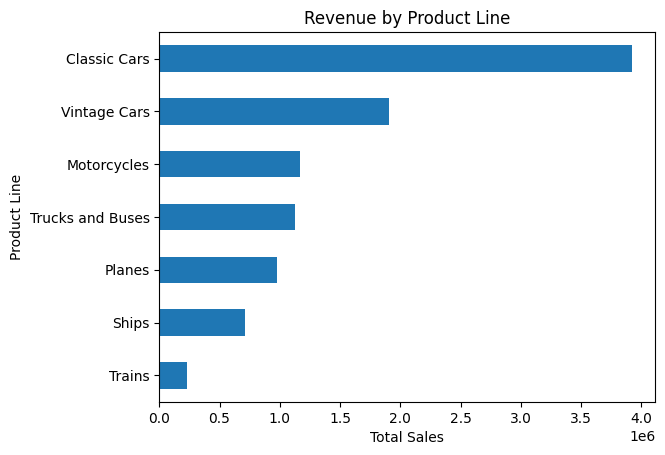

In [17]:
top_products = df.groupby('PRODUCTLINE')['SALES'].sum().sort_values()

top_products.plot(kind='barh')
plt.title("Revenue by Product Line")
plt.xlabel("Total Sales")
plt.ylabel("Product Line")
plt.show()

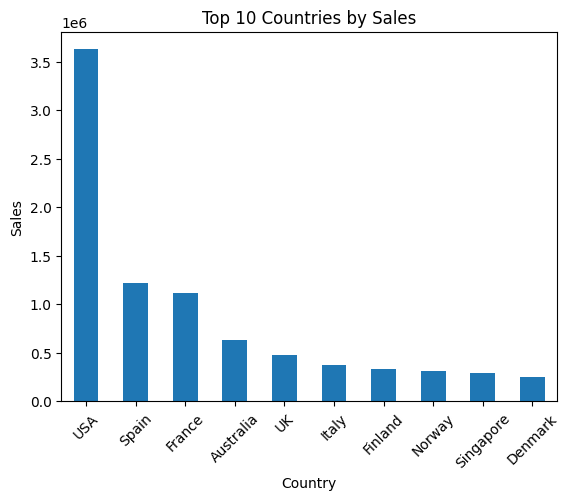

In [18]:
country_sales = (
    df.groupby('COUNTRY')['SALES']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_sales.plot(kind='bar')
plt.title("Top 10 Countries by Sales")
plt.xlabel("Country")
plt.ylabel("Sales")
plt.xticks(rotation=45)
plt.show()

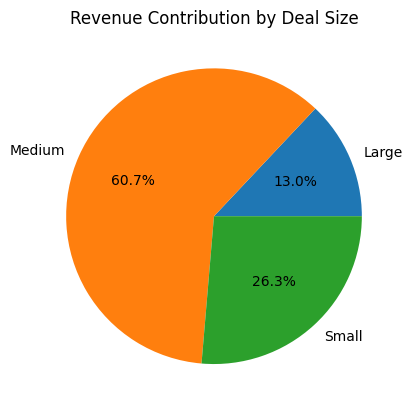

In [19]:
deal_size = df.groupby('DEALSIZE')['SALES'].sum()

deal_size.plot(kind='pie', autopct='%1.1f%%')
plt.title("Revenue Contribution by Deal Size")
plt.ylabel("")
plt.show()

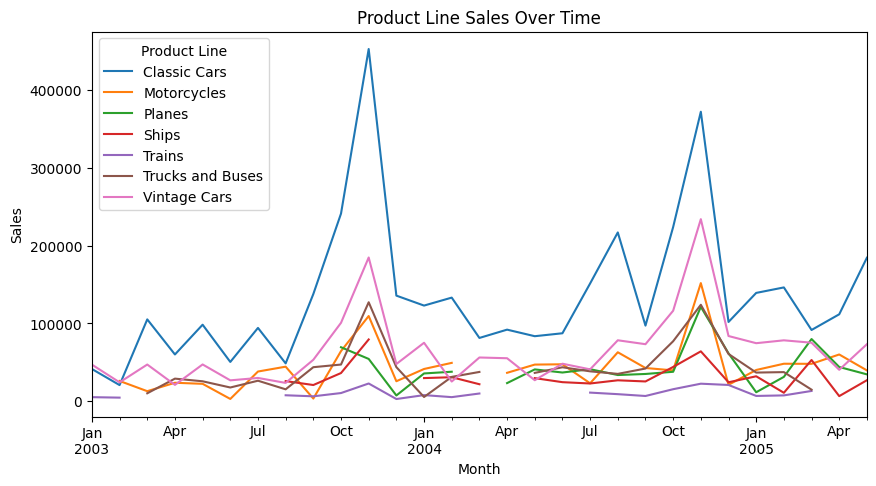

In [20]:
product_trend = df.groupby(
    [df['ORDERDATE'].dt.to_period('M'), 'PRODUCTLINE']
)['SALES'].sum().unstack()

product_trend.plot(figsize=(10,5))
plt.title("Product Line Sales Over Time")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.legend(title="Product Line")
plt.show()

## 📊 Key Insights
📊 Final Insights — Sales Performance Analysis
1️⃣ Sales Trend & Seasonality
The time-series analysis reveals strong seasonal patterns, with significant revenue spikes during Q4 (October–November) each year.
This indicates that sales are heavily influenced by seasonal demand cycles, suggesting that inventory planning, marketing spend, and staffing should be optimized ahead of peak periods.

2️⃣ Revenue Concentration by Deal Size
Large deals generate the highest portion of total revenue, contributing substantially more than medium and small deals combined.
This highlights the importance of maintaining strong relationships with high-value clients and prioritizing enterprise sales strategies.

3️⃣ Product Line Contribution
Revenue is concentrated in a few top-performing product lines, while several categories contribute relatively smaller shares.
This suggests an opportunity to:
Focus marketing and forecasting efforts on high-performing products
Evaluate underperforming categories for optimization or repositioning

4️⃣ Geographic Performance
Sales distribution across countries shows that a limited number of markets account for a significant share of total revenue.
This concentration indicates both:
Dependence on key regions
Potential growth opportunities in lower-performing markets

5️⃣ Customer Revenue Distribution
Analysis of top customers shows that a small segment contributes a disproportionately large share of revenue, reflecting a Pareto-like distribution.
This underscores the importance of customer retention strategies, account management, and loyalty programs.

6️⃣ Customer Behavior & Loyalty
Repeat purchase analysis indicates the presence of loyal customers who generate multiple orders over time.
These customers represent high lifetime value and should be prioritized through targeted engagement and retention initiatives.

7️⃣ Business KPI — Average Order Value (AOV)
The calculated Average Order Value provides a benchmark for transaction performance and helps evaluate pricing strategies, upselling effectiveness, and revenue per customer interaction.


## 🧾 Conclusion

This analysis of historical sales data reveals that revenue performance is strongly influenced by seasonality, with consistent spikes during the fourth quarter each year. The findings indicate that a significant portion of total revenue is driven by large deal sizes and a limited set of high-performing product lines, highlighting both growth opportunities and concentration risks.

Additionally, sales activity is uneven across regions and customer segments, suggesting that targeted strategies could further optimize performance. Overall, the analysis provides a clear understanding of revenue drivers and operational patterns, enabling more informed planning, forecasting, and strategic decision-making.

## 📌 Recommendations
💡 Recommendations

Based on the analysis, the following actions are recommended to improve sales performance and operational efficiency:

1️⃣ Optimize for Seasonal Demand
Increase inventory, marketing campaigns, and sales staffing ahead of Q4 to capitalize on peak demand periods and avoid stock shortages.

2️⃣ Focus on High-Value Deals
Since large deals contribute the majority of revenue, prioritize enterprise customers, strengthen relationship management, and develop targeted pricing strategies.

3️⃣ Diversify Product Revenue Streams
Reduce dependency on a few top-performing product lines by promoting underperforming categories through bundling, discounts, or targeted campaigns.

4️⃣ Regional Strategy Optimization
Identify high-performing geographic markets and replicate successful sales strategies, while reassessing low-performing regions for improvement opportunities.

5️⃣ Improve Forecasting with Data
Implement data-driven forecasting models to better predict demand patterns, enabling smarter inventory and resource planning.

These recommendations can help increase revenue stability, improve customer targeting, and support long-term business growth.